## Colorado Oil & Gas Drilling Permits
##### Investigating how the number of Drilling permits changed over the past year (June 2016-June 2017)

* Has the new administration had an effect on the permit approval process?
* Has the number of permit requests increased?

In [20]:
from __future__ import division
import pandas as pd
import numpy as np
from datetime import timedelta
import pymc3 as pm
import theano.tensor as tt
import matplotlib.pyplot as plt
import matplotlib as mpl
from pylab import rcParams
%matplotlib inline

#### Data Import

In [21]:
# Import Colorado Oil & Gas Well permits approved 4/11/2012 - 8/28/2017
# http://cogcc.state.co.us/data.html#/cogis
df_wells = pd.read_csv("data/older_well_permits_clean.csv")

df_wells.sample(5)

,Unnamed: 0,facility_id_API,facility_type,status,facility_name,facility_num,field_name,field_num,county,coord,operator_name,operator_num
34464,34464,05-067-08329,WELL,5/9/2000,RONALD REA,2,IGNACIO BLANCO,38300.0,LA PLATA,067SWSE 32 34N 8W M,BP AMERICA PRODUCTION COMPANY,10000.0
45041,45041,05-077-09841,WELL,2/12/2013,NBC,17-123,BUZZARD CREEK,9500.0,MESA,077NENW 17 9S 93W 6,LARAMIE ENERGY LLC,10433.0
61467,61467,05-103-12094,WELL,3/15/2016,FEDERAL,RGU 321-26-198,SULPHUR CREEK,80090.0,RIO BLANCO,103Lot 4 26 1S 98W 6,TEP ROCKY MOUNTAIN LLC,96850.0
10522,10522,05-029-06060,WELL,4/29/2001,"CHILDRESS, CHARLIE",1,CRAWFORD,13555.0,DELTA,029NWNE 7 51N 6W N,ZIEGLER* ROBERT P.,98393.0
71868,71868,05-123-39503,WELL,12/5/2016,Ruh,6-62-11-0263CH2,WATTENBERG,90750.0,WELD,123NWNW 11 6N 62W 6,BARRETT CORPORATION* BILL,10071.0


In [22]:
df_wells.describe()

,Unnamed: 0,field_num,operator_num
count,107257.000000,107129.000000,1.070260e+05
mean,53628.000000,69798.895462,5.079957e+04
std,30962.573248,29933.900957,3.787345e+04
min,0.000000,150.000000,1.000000e+00
25%,26814.000000,NaN,NaN
50%,53628.000000,NaN,NaN
75%,80442.000000,NaN,NaN
max,107256.000000,99999.000000,1.001006e+06


In [23]:
print("Min date of permitted wells: {}".format(df_wells['status'].min()))
print("Max date of permitted wells: {}".format(df_wells['status'].max()))

Min date of permitted wells: inf
Max date of permitted wells: 9/9/2016


In [24]:
# Getting listing of Companies with most well permits approved in this time period
df_wells.groupby('operator_name').count()['county'].sort_values(axis=0, ascending=False)

operator_name
KERR MCGEE OIL & GAS ONSHORE LP               8203
NOBLE ENERGY INC                              7484
TEP ROCKY MOUNTAIN LLC                        5950
ENCANA OIL & GAS (USA) INC                    4834
PDC ENERGY INC                                3258
PIONEER NATURAL RESOURCES USA INC             2800
CRESTONE PEAK RESOURCES OPERATING LLC         1811
LARAMIE ENERGY LLC                            1738
FOUNDATION ENERGY MANAGEMENT LLC              1729
BP AMERICA PRODUCTION COMPANY                 1540
CHEVRON USA INC                               1535
XTO ENERGY INC                                1324
K P KAUFFMAN COMPANY INC                      1321
VANGUARD OPERATING LLC                        1133
ROSEWOOD RESOURCES INC                        1072
AUGUSTUS ENERGY RESOURCES LLC                 1039
BONANZA CREEK ENERGY OPERATING COMPANY LLC    1037
EXTRACTION OIL & GAS INC                      1006
UNKNOWN                                       1004
CAERUS PICEANCE L

In [25]:
# Getting number of wells by County
df_wells.groupby('county').count()['operator_name'].sort_values(axis=0, ascending=False)

county
WELD          32625
GARFIELD      15631
RIO BLANCO     6937
YUMA           6233
WASHINGTON     5765
LA PLATA       4549
ADAMS          4396
LAS ANIMAS     3987
LOGAN          3922
MORGAN         3026
MESA           2633
MOFFAT         2267
CHEYENNE       1808
ARAPAHOE       1340
MONTEZUMA      1070
KIOWA           986
BACA            956
BOULDER         784
LINCOLN         780
JACKSON         759
LARIMER         731
ELBERT          731
ARCHULETA       523
PHILLIPS        497
PROWERS         472
ROUTT           416
FREMONT         402
KIT CARSON      396
HUERFANO        368
SAN MIGUEL      298
BENT            271
BROOMFIELD      248
DOLORES         202
SEDGWICK        171
GUNNISON        157
DELTA           145
DENVER          132
EL PASO         129
MONTROSE         93
JEFFERSON        65
GRAND            59
PUEBLO           48
OTERO            33
CROWLEY          32
PARK             28
PITKIN           27
OURAY            26
DOUGLAS          23
SAGUACHE         18
CHAFFEE      

In [60]:
def line_plot(df, column):
    # Creating line plot
    
    # Setting up display parameters
    mpl.rc('xtick', labelsize=12)
    mpl.rc('ytick', labelsize=12)
    mpl.rcParams.update({'font.size': 15})

    # Plotting Day vs. Average Number of Patients
    x = range(len(df.groupby(column).count().index))
    y = df.groupby(column).count()['county'].values
    labels = df.groupby(column).count().index
    
    fig=plt.figure(figsize=(200,7));
    ax=fig.add_subplot(111);
    ax.plot(x, y, color='b', linewidth=1.5);
    plt.xticks(x, labels, rotation='vertical')
#     plt.xticks(rotation='vertical');

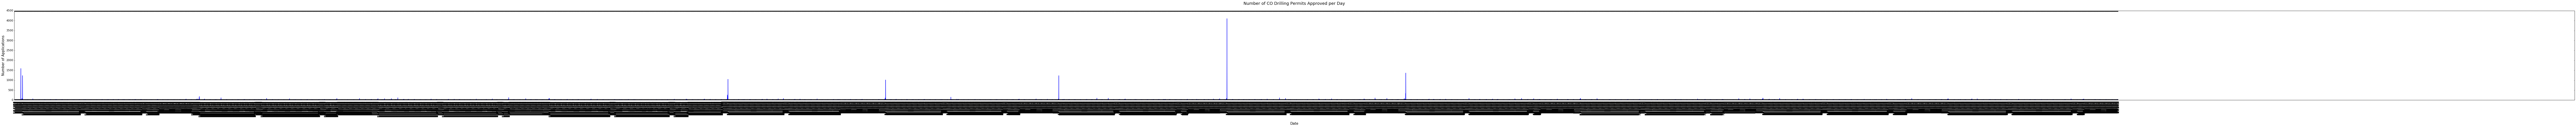

In [61]:
# Plotting the number Number of permits approved per Day in Colorado
line_plot(df_wells, 'status')
plt.title("Number of CO Drilling Permits Approved per Day\n");
plt.xlabel('\nDate');
plt.ylabel('Number of Applications');